In [1]:
import tensorflow as tf
import numpy as np
import os
import sys
import skimage
import pylab as plt
from importlib import reload

sys.path.insert(0, '../src')
import deepleeo.dataset.data_augment as dtaug
import deepleeo.dataset.utils as dsutils
reload(dtaug)
reload(dsutils)

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<module 'deepleeo.dataset.utils' from '../src/deepleeo/dataset/utils.py'>

# Load input Dataset

In [2]:
DATA_DIR = os.path.join(os.path.abspath(os.path.dirname("__file__")), '../', 'data_real', 'generated')
DATASET_FILE = os.path.join(DATA_DIR, 'samples_dataset.npz')

In [3]:
dataset = np.load(DATASET_FILE)

print("Data Loaded:")
print("  -> Images: ", len(dataset["images"]))
print("  -> Labels: ", len(dataset["labels"]))
print("  -> Classes: ", len(dataset["classes"]))

print("Images shape: ", dataset["images"][0].shape)
print("Labels shape: ", dataset["labels"][0].shape)

Data Loaded:
  -> Images:  5000
  -> Labels:  5000
  -> Classes:  4
Images shape:  (128, 128, 7)
Labels shape:  (128, 128, 1)


(-0.5, 127.5, 127.5, -0.5)

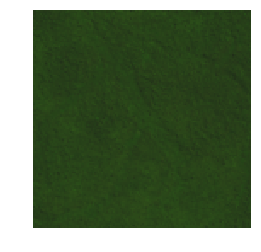

In [4]:
plt.figure(figsize=(4,4))
img_plt = skimage.img_as_float(dataset["images"][0][:,:,[5, 4, 3]]).astype(np.float32)
plt.imshow(img_plt)
plt.axis('off')

# Perform Data Augmentation

In [5]:
angles = [90, 180, 270]
rotated_imgs = dtaug.rotate_images(dataset["images"], angles)
flipped_imgs = dtaug.flip_images(dataset["images"])

new_dataset = {}
new_dataset["images"] = np.concatenate((dataset["images"], rotated_imgs))
new_dataset["images"] = np.concatenate((new_dataset["images"], flipped_imgs))

rotated_lbls = dtaug.rotate_images(dataset["labels"], angles)
flipped_lbls = dtaug.flip_images(dataset["labels"])

new_dataset["labels"] = np.concatenate((dataset["labels"], rotated_lbls))
new_dataset["labels"] = np.concatenate((new_dataset["labels"], flipped_lbls))

new_dataset["classes"] = dataset["classes"]

print("Data Augmentation Applied:")
print("  -> Images: ", new_dataset["images"].shape)
print("  -> Labels: ", new_dataset["labels"].shape)

Data Augmentation Applied:
  -> Images:  (35000, 128, 128, 7)
  -> Labels:  (35000, 128, 128, 1)


# Split dataset between train, test and validation data

In [6]:
train_images, test_images, valid_images, train_labels, test_labels, valid_labels = dsutils.split_dataset(new_dataset)

print("Splitted dataset:")
print("  -> Train images: ", train_images.shape)
print("  -> Test images: ", test_images.shape)
print("  -> Validation images: ", valid_images.shape)
print("  -> Train Labels: ", train_labels.shape)
print("  -> Test Labels: ", test_labels.shape)
print("  -> Validation Labels: ", valid_labels.shape)

ValueError: datetime.datetime(2018, 7, 25, 17, 52, 29, 39911) cannot be used to seed a numpy.random.RandomState instance

# Train the Network

In [ ]:
hiper_params = {
    "epochs": 10,
    "batch_size": 256,
    "learning_rate": 0.0001
}